In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
net = pd.read_csv('dataset\\Internet-Demographic.csv')

In [3]:
net

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [4]:
net['Country Name'] = net['Country Name'].astype('category')
net['Country Code'] = net['Country Code'].astype('category')

In [5]:
net.dtypes

Country Name      category
Country Code      category
Birth rate         float64
Internet users     float64
Income Group        object
dtype: object

<h1>1. Distribution of Birth Rates</h1>
<H2>*Visualize the distribution of birth rate using a histogram.</H2>
<H2>*Include appropriate labels, a title, and gridlines for clarity.</H2>

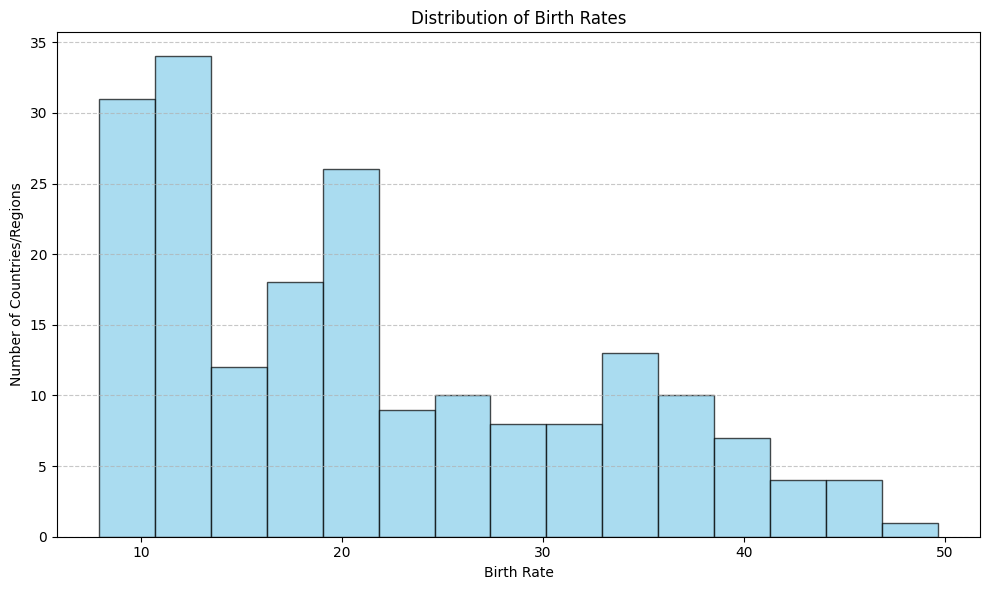

In [6]:
birth_rates = net['Birth rate']
plt.figure(figsize=(10, 6)) 
plt.hist(birth_rates, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel("Birth Rate")
plt.ylabel("Number of Countries/Regions")
plt.title("Distribution of Birth Rates")
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

<H1>2. Tap 5 Countries with the Highest Internet Usage</H1>
<h2>*Identify and display the names and values of the top 5 countries with the highest percentage of the internet users.</h2>

In [7]:
top_3_years_cases = net.groupby("Country Name")["Internet users"].sum().nlargest(5)
print("Top 3 years with the highest dengue cases:")
print(top_3_years_cases)

Top 3 years with the highest dengue cases:
Country Name
Iceland    96.5468
Bermuda    95.3000
Norway     95.0534
Sweden     94.7836
Denmark    94.6297
Name: Internet users, dtype: float64


<h1>3. Count of Countries by Income Group</h1>
<h2>*Count how many countries belong to each income group(high income, middle income, etc.)</h2>

In [8]:
income_group_counts = net['Income Group'].value_counts()
print(income_group_counts)

Income Group
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64


<h1>4. Box plot of Internet Usage(Optional)</h1>
<h2>*Visualize the distribution of internet usage using a box plot.</h2>
<h2>*If you are unfamiliar with box plots, skip this task or attempt it for additional points.</h2>

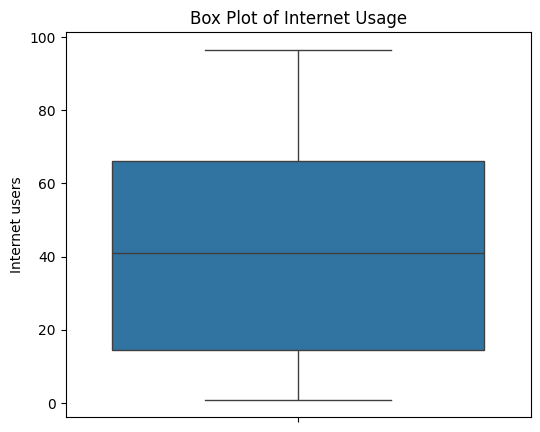

In [9]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=net["Internet users"])
plt.ylabel("Internet users")
plt.title("Box Plot of Internet Usage")
plt.show()

<h1>5. Countries with No Internet Access</h1>
<h2>"Identify and display the names of countries where internet usage is 0%.</h2>

In [10]:
display(net.head())
zero_internet_countries = net[net['Internet users'] == 0]['Country Name']
display(zero_internet_countries)


,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


Series([], Name: Country Name, dtype: category
Categories (195, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'])

In [11]:
net.dtypes

Country Name      category
Country Code      category
Birth rate         float64
Internet users     float64
Income Group        object
dtype: object

<h1>6. Average Birth Rate</h1>
<h2>*Calculate and Display the average(mean) birth rate across all countries.</h2>

In [12]:
avg_birth_rate = net.groupby('Country Name')["Birth rate"].mean()
print(f"Average Birth Rate")
print(avg_birth_rate)

Average Birth Rate
Country Name
Afghanistan              35.253
Albania                  12.877
Algeria                  24.738
Angola                   45.985
Antigua and Barbuda      16.447
                          ...  
Virgin Islands (U.S.)    10.700
West Bank and Gaza       30.394
Yemen, Rep.              32.947
Zambia                   40.471
Zimbabwe                 35.715
Name: Birth rate, Length: 195, dtype: float64


<h1>7. Scatter Plot: Birth Rate vs. Internet Usage</h1>
<h2>"Create a scatter plot to visualize the relationship between birth rate and internet usage.</h2>

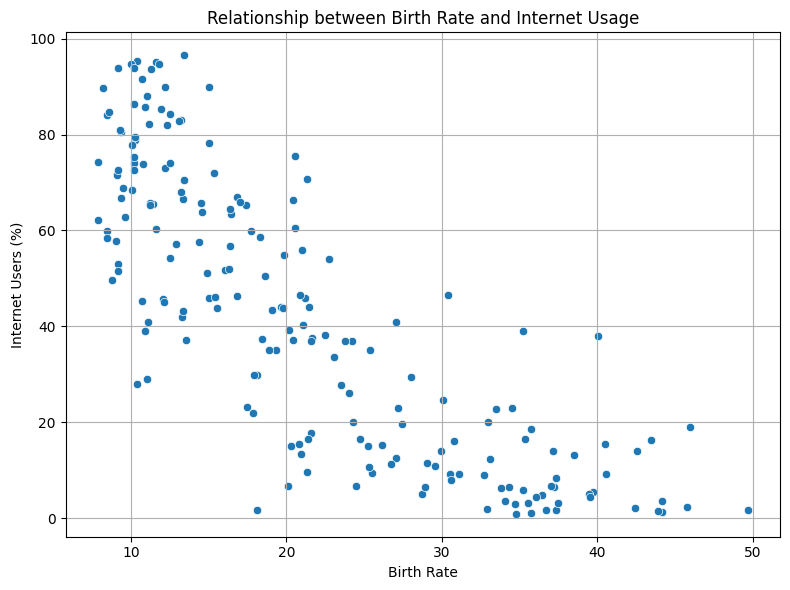

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=net, x='Birth rate', y='Internet users')
plt.title('Relationship between Birth Rate and Internet Usage')
plt.xlabel('Birth Rate')
plt.ylabel('Internet Users (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>8. Countries with Birth Rates Above 40</h1>
<h2>*Identify and Display the names and birth rates of countries with a birth rate greater than 40</h2>

In [14]:
high_birth_rate = net[net["Birth rate"] >= 40]
print("Countries with Birth Rate Above 40:")
print(high_birth_rate)

Countries with Birth Rate Above 40:
         Country Name Country Code  Birth rate  Internet users  \
2              Angola          AGO      45.985            19.1   
11            Burundi          BDI      44.151             1.3   
14       Burkina Faso          BFA      40.551             9.1   
65        Gambia, The          GMB      42.525            14.0   
115              Mali          MLI      44.138             3.5   
127             Niger          NER      49.661             1.7   
128           Nigeria          NGA      40.045            38.0   
156           Somalia          SOM      43.891             1.5   
167              Chad          TCD      45.745             2.3   
178            Uganda          UGA      43.474            16.2   
192  Congo, Dem. Rep.          COD      42.394             2.2   
193            Zambia          ZMB      40.471            15.4   

            Income Group  
2    Upper middle income  
11            Low income  
14            Low income

<h1>9. Pie Chart of income Groups</h1>
<h2>"Visualize the proportion of countries in each income group using a pie chart</h2>
<h2>"Include percentages and legend for clarity</h2>

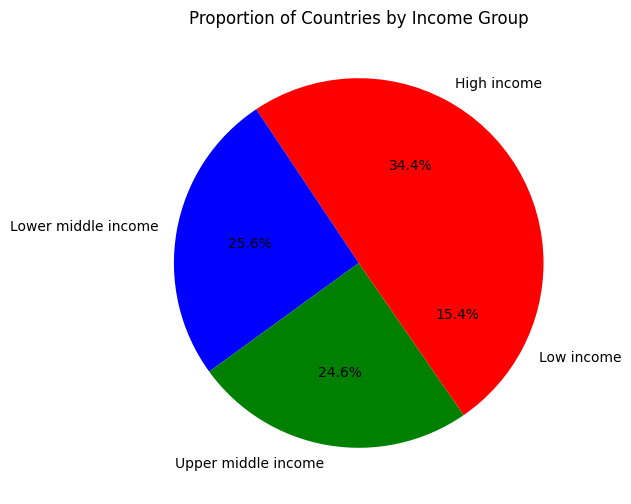

In [15]:
plt.figure(figsize=(6, 6))
net["Income Group"].value_counts().plot.pie(autopct='%1.1f%%', colors=["red", "blue", "green"])
plt.title("Proportion of Countries by Income Group")
plt.ylabel("") 
plt.show()

In [16]:
net.dtypes

Country Name      category
Country Code      category
Birth rate         float64
Internet users     float64
Income Group        object
dtype: object

<h1>10. Correlation Botween Birth Rates and Internet Usage</h1>
<h2>"Calculate the correlation between Birth Rate and Internet Usage</h2>
<h2>*Interpret the result (e.g. positive, negative, weak, or strong correlation)</h2>

In [17]:
correlation = net["Birth rate"].corr(net["Internet users"])
print(f"Correlation between Birth Rate and Internet Usage:")
print(correlation)

Correlation between Birth Rate and Internet Usage:
-0.8155885551284765
